# UZOP projekt

Članovi tima:
- Marko Jerkić 0036523807
- Nikola Borzić 0036539104
- Franjo Vuković 0036542185

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
import matplotlib.pyplot as plt
import xgboost as xgb

In [4]:
def loadDF():
    file_path = r"./data/shot_logs.csv"
    df = pd.read_csv(file_path)

    df['SHOT_CLOCK'] = df['SHOT_CLOCK'].fillna(df['SHOT_CLOCK'].median())

    def convert_time_to_seconds(clock):
        if isinstance(clock, str):
            minutes, seconds = map(int, clock.split(":"))
            return minutes * 60 + seconds
        return None

    df['GAME_CLOCK'] = df['GAME_CLOCK'].apply(convert_time_to_seconds)

    df['LOCATION_NUM'] = df['LOCATION'].map({'H': 1, 'A': 0})
    df['W_NUM'] = df['W'].map({'W': 1, 'L': 0})

    return df

# Logistic regression


Logistic Regression - Rezultati za različite parametre
Parametri: {'C': 0.01, 'penalty': 'l2', 'max_iter': 500}, Točnost: 0.6188
              precision    recall  f1-score   support

           0       0.63      0.73      0.68      3489
           1       0.60      0.48      0.53      2915

    accuracy                           0.62      6404
   macro avg       0.62      0.61      0.61      6404
weighted avg       0.62      0.62      0.61      6404



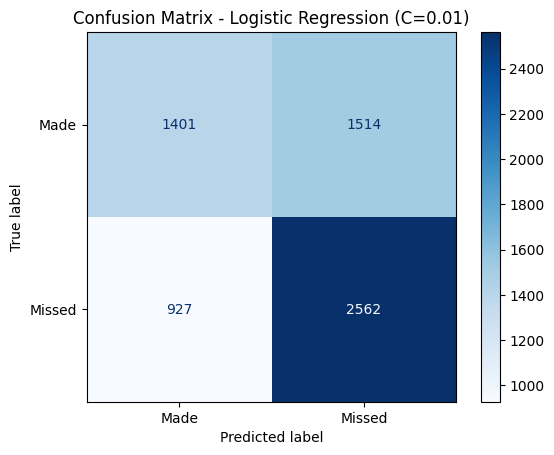

Parametri: {'C': 0.1, 'penalty': 'l2', 'max_iter': 1000}, Točnost: 0.6190
              precision    recall  f1-score   support

           0       0.63      0.73      0.68      3489
           1       0.60      0.48      0.54      2915

    accuracy                           0.62      6404
   macro avg       0.62      0.61      0.61      6404
weighted avg       0.62      0.62      0.61      6404



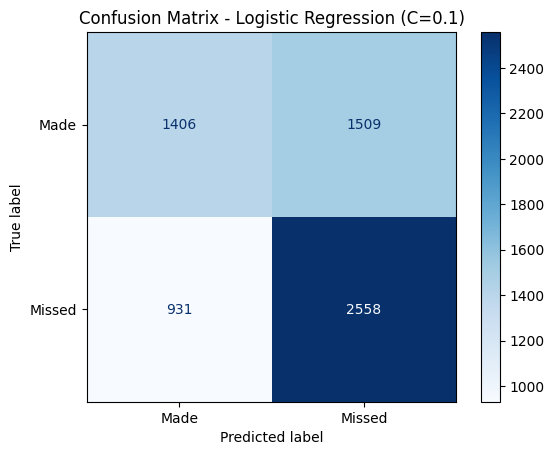

Parametri: {'C': 1.0, 'penalty': 'l2', 'max_iter': 1000}, Točnost: 0.6190
              precision    recall  f1-score   support

           0       0.63      0.73      0.68      3489
           1       0.60      0.48      0.54      2915

    accuracy                           0.62      6404
   macro avg       0.62      0.61      0.61      6404
weighted avg       0.62      0.62      0.61      6404



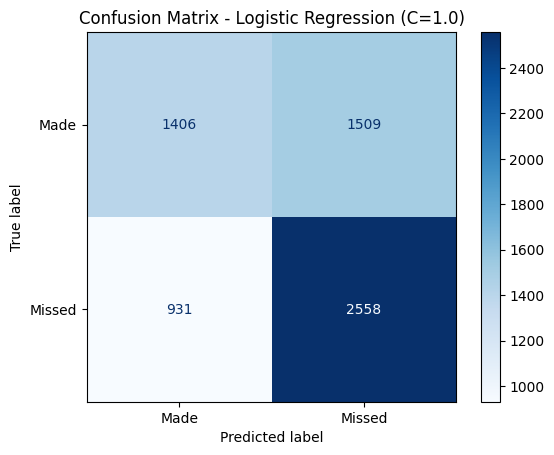

Parametri: {'C': 10, 'penalty': 'l2', 'max_iter': 2000}, Točnost: 0.6190
              precision    recall  f1-score   support

           0       0.63      0.73      0.68      3489
           1       0.60      0.48      0.54      2915

    accuracy                           0.62      6404
   macro avg       0.62      0.61      0.61      6404
weighted avg       0.62      0.62      0.61      6404



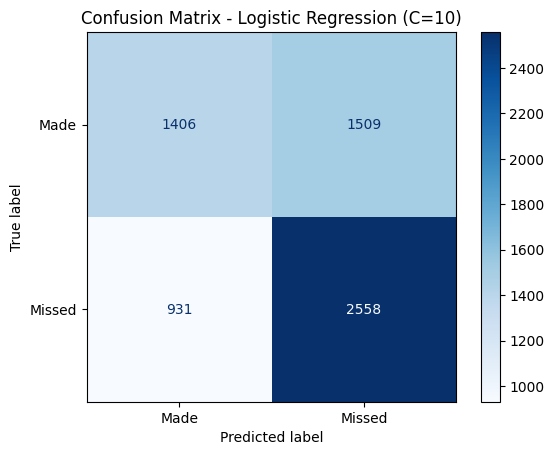

In [5]:
df = loadDF()

encoder = LabelEncoder()
df['CLOSEST_DEFENDER_ENCODED'] = encoder.fit_transform(df['CLOSEST_DEFENDER'])

features = [
    'SHOT_DIST', 'CLOSE_DEF_DIST', 'SHOT_CLOCK', 'TOUCH_TIME', 'DRIBBLES', 'PTS_TYPE',
    'FINAL_MARGIN', 'SHOT_NUMBER', 'GAME_CLOCK', 'PERIOD', 'LOCATION_NUM', 'W_NUM'
]
X = df[features]
y = df['SHOT_RESULT'].map({'made': 1, 'missed': 0})

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.05, random_state=42)

lr_params = [
    {'C': 0.01, 'penalty': 'l2', 'max_iter': 500},
    {'C': 0.1, 'penalty': 'l2', 'max_iter': 1000},
    {'C': 1.0, 'penalty': 'l2', 'max_iter': 1000},
    {'C': 10, 'penalty': 'l2', 'max_iter': 2000},
]

print("\nLogistic Regression - Rezultati za različite parametre")
for params in lr_params:
    lr_model = LogisticRegression(C=params['C'], penalty=params['penalty'], max_iter=params['max_iter'])
    lr_model.fit(X_train, y_train)
    y_pred_lr = lr_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred_lr)
    print(f"Parametri: {params}, Točnost: {acc:.4f}")
    print(classification_report(y_test, y_pred_lr))
    cm = confusion_matrix(y_test, y_pred_lr, labels=[1, 0])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Made", "Missed"])
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - Logistic Regression (C={params['C']})")
    plt.show()


# SVN

Model fit done for parameters: {'C': 0.1, 'kernel': 'linear', 'gamma': 'scale'}

SVM with C=0.1, kernel=linear - Accuracy: 0.6004059962523423

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.67      0.65      3489
           1       0.57      0.51      0.54      2915

    accuracy                           0.60      6404
   macro avg       0.60      0.59      0.59      6404
weighted avg       0.60      0.60      0.60      6404



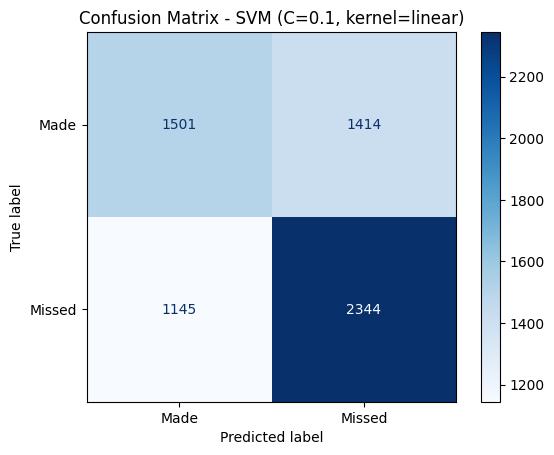

Model fit done for parameters: {'C': 1.0, 'kernel': 'rbf', 'gamma': 'scale'}

SVM with C=1.0, kernel=rbf - Accuracy: 0.622735790131168

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.84      0.71      3489
           1       0.66      0.36      0.46      2915

    accuracy                           0.62      6404
   macro avg       0.63      0.60      0.59      6404
weighted avg       0.63      0.62      0.60      6404



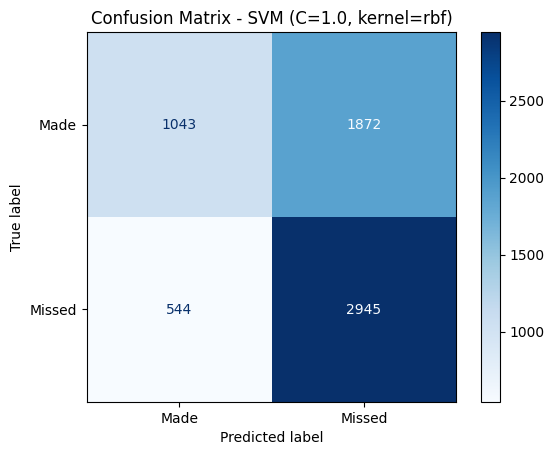

Model fit done for parameters: {'C': 10.0, 'kernel': 'poly', 'gamma': 'scale', 'degree': 3}

SVM with C=10.0, kernel=poly - Accuracy: 0.6233603997501561

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.80      0.70      3489
           1       0.63      0.42      0.50      2915

    accuracy                           0.62      6404
   macro avg       0.63      0.61      0.60      6404
weighted avg       0.62      0.62      0.61      6404



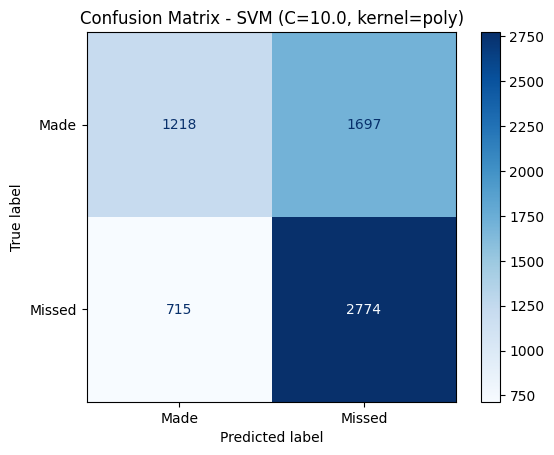

In [20]:
df = loadDF()

encoder = LabelEncoder()
df['CLOSEST_DEFENDER_ENCODED'] = encoder.fit_transform(df['CLOSEST_DEFENDER'])

features = [
    'SHOT_DIST', 'CLOSE_DEF_DIST', 'SHOT_CLOCK', 'TOUCH_TIME', 'DRIBBLES', 'PTS_TYPE',
    'FINAL_MARGIN', 'SHOT_NUMBER', 'GAME_CLOCK', 'PERIOD', 'LOCATION_NUM', 'W_NUM'
]
X = df[features]
y = df['SHOT_RESULT'].map({'made': 1, 'missed': 0})

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.05, random_state=42)

svm_param_sets = [
    {'C': 0.1, 'kernel': 'linear', 'gamma': 'scale'},
    {'C': 1.0, 'kernel': 'rbf', 'gamma': 'scale'},
    {'C': 10.0, 'kernel': 'poly', 'gamma': 'scale', 'degree': 3}
]

for params in svm_param_sets:
    svm_model = SVC(C=params['C'], kernel=params['kernel'], gamma=params['gamma'], degree=params.get('degree', 3))
    svm_model.fit(X_train, y_train)
    print(f"Model fit done for parameters: {params}")

    y_pred = svm_model.predict(X_test)

    print(f"\nSVM with C={params['C']}, kernel={params['kernel']} - Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Made", "Missed"])
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - SVM (C={params['C']}, kernel={params['kernel']})")
    plt.show()


# Nerual network

## Sigmoidalna aktivacijska funkcija

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Network with 50 units and sigmoid activation - Accuracy: 0.5460649594003748

Classification Report:
              precision    recall  f1-score   support

           0       0.55      1.00      0.71      3489
           1       0.75      0.00      0.01      2915

    accuracy                           0.55      6404
   macro avg       0.65      0.50      0.36      6404
weighted avg       0.64      0.55      0.39      6404



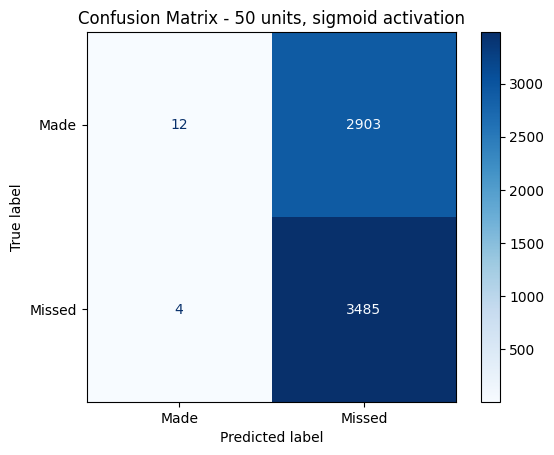

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Network with 100 units and relu activation - Accuracy: 0.6150843222985634

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.74      0.68      3489
           1       0.60      0.47      0.53      2915

    accuracy                           0.62      6404
   macro avg       0.61      0.60      0.60      6404
weighted avg       0.61      0.62      0.61      6404



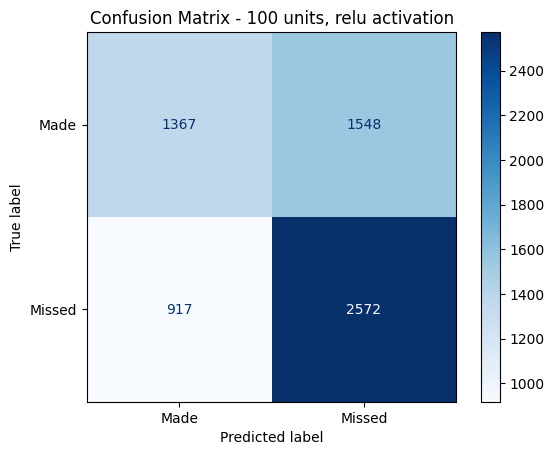

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Network with 150 units and tanh activation - Accuracy: 0.6194565896314803

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.79      0.69      3489
           1       0.62      0.41      0.50      2915

    accuracy                           0.62      6404
   macro avg       0.62      0.60      0.60      6404
weighted avg       0.62      0.62      0.60      6404



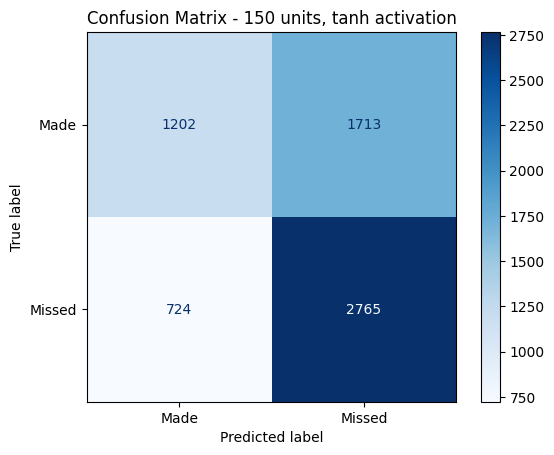

In [18]:
from keras import models, layers, regularizers

encoder = LabelEncoder()
df = loadDF()
df['CLOSEST_DEFENDER_ENCODED'] = encoder.fit_transform(df['CLOSEST_DEFENDER'])

features = [
    'SHOT_DIST', 'CLOSE_DEF_DIST', 'SHOT_CLOCK', 'TOUCH_TIME', 'DRIBBLES', 'PTS_TYPE',
    'FINAL_MARGIN', 'SHOT_NUMBER', 'GAME_CLOCK', 'PERIOD', 'LOCATION_NUM', 'W_NUM'
]
X = df[features]
y = df['SHOT_RESULT'].map({'made': 1, 'missed': 0})

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.05, random_state=42)

param_sets = [
    {'units': 50, 'activation': 'sigmoid', 'epochs': 50, 'batch_size': 32},
    {'units': 100, 'activation': 'relu', 'epochs': 100, 'batch_size': 64},
    {'units': 150, 'activation': 'tanh', 'epochs': 150, 'batch_size': 128}
]

for params in param_sets:
    model = models.Sequential([
        layers.Dense(params['units'], activation=params['activation'], kernel_regularizer=regularizers.l2(0.01), input_shape=(X_train.shape[1],)),
        layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01))
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=params['epochs'], batch_size=params['batch_size'], validation_split=0.1, verbose=0)

    y_pred = (model.predict(X_test) > 0.5).astype("int32")

    print(f"\nNetwork with {params['units']} units and {params['activation']} activation - Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Made", "Missed"])
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - {params['units']} units, {params['activation']} activation")
    plt.show()

# Druga mreža

## ReLu aktivacijska funkcija

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Second Network with 50 units and relu activation - Accuracy: 0.6163335415365396

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.76      0.68      3489
           1       0.61      0.45      0.52      2915

    accuracy                           0.62      6404
   macro avg       0.61      0.60      0.60      6404
weighted avg       0.61      0.62      0.61      6404



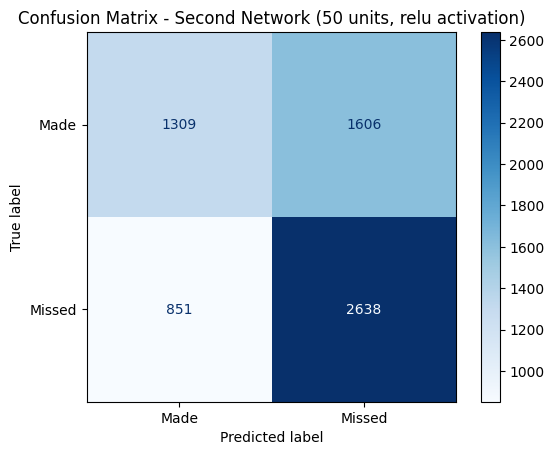

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Second Network with 100 units and relu activation - Accuracy: 0.6103997501561524

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.72      0.67      3489
           1       0.59      0.48      0.53      2915

    accuracy                           0.61      6404
   macro avg       0.61      0.60      0.60      6404
weighted avg       0.61      0.61      0.60      6404



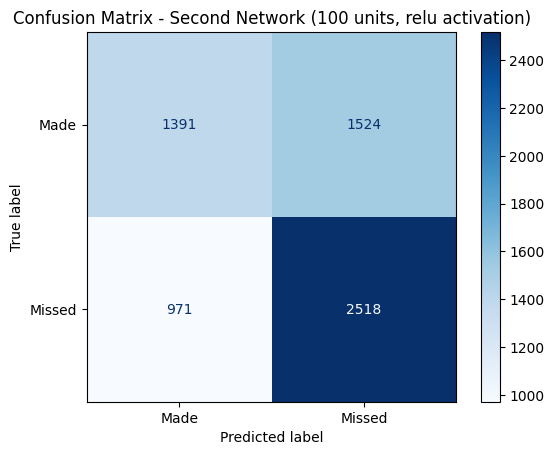

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Second Network with 150 units and relu activation - Accuracy: 0.6200811992504685

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.80      0.70      3489
           1       0.63      0.41      0.50      2915

    accuracy                           0.62      6404
   macro avg       0.62      0.60      0.60      6404
weighted avg       0.62      0.62      0.60      6404



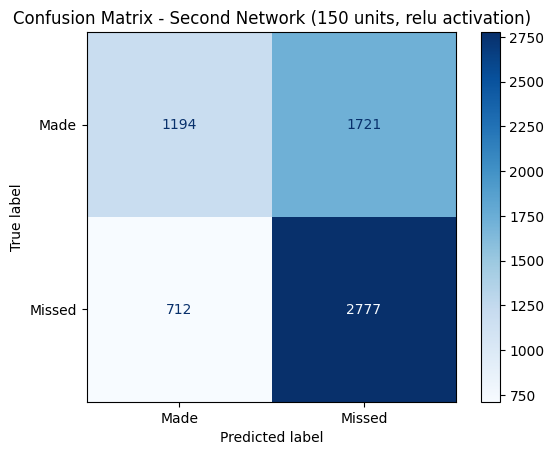

In [19]:
param_sets2 = [
    {'units': 50, 'activation': 'relu', 'epochs': 50, 'batch_size': 32},
    {'units': 100, 'activation': 'relu', 'epochs': 100, 'batch_size': 64},
    {'units': 150, 'activation': 'relu', 'epochs': 150, 'batch_size': 128}
]

for params in param_sets2:
    model2 = models.Sequential([
        layers.Dense(params['units'], activation=params['activation'], kernel_regularizer=regularizers.l2(0.01), input_shape=(X_train.shape[1],)),
        layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01))
    ])

    model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model2.fit(X_train, y_train, epochs=params['epochs'], batch_size=params['batch_size'], validation_split=0.1, verbose=0)

    y_pred2 = (model2.predict(X_test) > 0.5).astype("int32")

    print(f"\nSecond Network with {params['units']} units and {params['activation']} activation - Accuracy:", accuracy_score(y_test, y_pred2))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred2))

    cm2 = confusion_matrix(y_test, y_pred2, labels=[1, 0])
    disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=["Made", "Missed"])
    disp2.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - Second Network ({params['units']} units, {params['activation']} activation)")
    plt.show()


# Naive Bayes


How much time did each combination have the best accuracy?
Addition: 200, Percentage: 20.0%, Average accuracy: 60.1011%
Multiplicative: 120, Percentage: 12.0%, Average accuracy: 60.106%
Weighted: 680, Percentage: 68.0%, Average accuracy: 60.261%


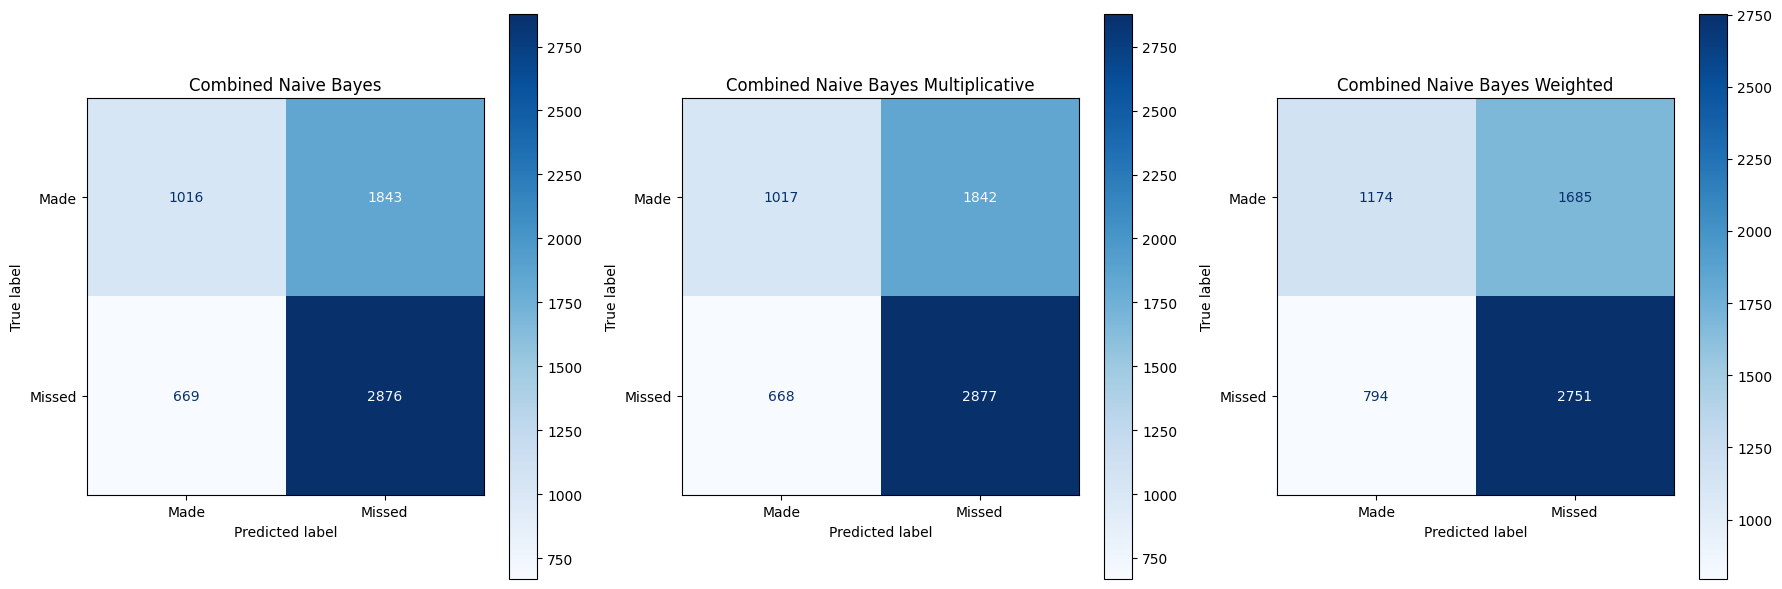

In [9]:
df = loadDF()

gaussian_features = ['SHOT_DIST', 'CLOSE_DEF_DIST', 'SHOT_CLOCK', 'FINAL_MARGIN', 'TOUCH_TIME', 'GAME_CLOCK']
multinomial_features = ['DRIBBLES', 'SHOT_NUMBER', 'PERIOD']
bernoulli_features = ['LOCATION_NUM', 'W_NUM', 'PTS_TYPE']

scaler = StandardScaler()

X_gaussian = scaler.fit_transform(df[gaussian_features])

X_multinomial = df[multinomial_features]
df['PTS_TYPE'] = df['PTS_TYPE'].map({2: 0, 3: 1})
X_bernoulli = df[bernoulli_features]

y = df['SHOT_RESULT'].map({'made': 1, 'missed': 0})

results = {0: 0, 1: 0, 2: 0}
n = 1000
accuracies = [0, 0, 0]

for i in range (n):

    X_train_gaussian, X_test_gaussian, X_train_multinomial, X_test_multinomial, X_train_bernoulli, X_test_bernoulli, y_train, y_test = train_test_split(
        X_gaussian, X_multinomial, X_bernoulli, y, test_size=0.05
    )

    model_g = GaussianNB()
    model_m = MultinomialNB()
    model_b = BernoulliNB()

    model_g.fit(X_train_gaussian, y_train)
    model_m.fit(X_train_multinomial, y_train)
    model_b.fit(X_train_bernoulli, y_train)

    y_pred_g = model_g.predict_proba(X_test_gaussian)
    y_pred_m = model_m.predict_proba(X_test_multinomial)
    y_pred_b = model_b.predict_proba(X_test_bernoulli)

    combined_probs = y_pred_g + y_pred_m + y_pred_b
    combined_pred = combined_probs.argmax(axis=1)

    combined_probs_mult = y_pred_g * y_pred_m * y_pred_b
    combined_pred_mult = combined_probs_mult.argmax(axis=1)

    combined_probs_weighted = (y_pred_g * 6) + (y_pred_m * 3) + (y_pred_b * 3)
    combined_pred_weighted = combined_probs_weighted.argmax(axis=1)

    tmp = [accuracy_score(y_test, combined_pred), accuracy_score(y_test, combined_pred_mult), accuracy_score(y_test, combined_pred_weighted)]
    accuracies = [sum(x) for x in zip(accuracies, tmp)]

    results[np.argmax(tmp)] += 1

print(f"\nHow much time did each combination have the best accuracy?")
print(f"Addition: {results[0]}, Percentage: {results[0] / n * 100}%, Average accuracy: {round(accuracies[0] / n * 100, 4)}%")
print(f"Multiplicative: {results[1]}, Percentage: {results[1] / n * 100}%, Average accuracy: {round(accuracies[1] / n * 100, 4)}%")
print(f"Weighted: {results[2]}, Percentage: {results[2] / n * 100}%, Average accuracy: {round(accuracies[2] / n * 100, 4)}%")

cm_combined = confusion_matrix(y_test, combined_pred, labels=[1, 0])
cm_mult = confusion_matrix(y_test, combined_pred_mult, labels=[1, 0])
cm_weighted = confusion_matrix(y_test, combined_pred_weighted, labels=[1, 0])

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

disp_combined = ConfusionMatrixDisplay(confusion_matrix=cm_combined, display_labels=["Made", "Missed"])
disp_combined.plot(cmap="Blues", ax=axes[0])
axes[0].set_title(f"Combined Naive Bayes")

disp_mult = ConfusionMatrixDisplay(confusion_matrix=cm_mult, display_labels=["Made", "Missed"])
disp_mult.plot(cmap="Blues", ax=axes[1])
axes[1].set_title(f"Combined Naive Bayes Multiplicative")

disp_weighted = ConfusionMatrixDisplay(confusion_matrix=cm_weighted, display_labels=["Made", "Missed"])
disp_weighted.plot(cmap="Blues", ax=axes[2])
axes[2].set_title(f"Combined Naive Bayes Weighted")

plt.tight_layout()
plt.show()

# Boosting


AdaBoost - Accuracy: 0.6046221111805122

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.82      0.69      3469
           1       0.62      0.35      0.45      2935

    accuracy                           0.60      6404
   macro avg       0.61      0.59      0.57      6404
weighted avg       0.61      0.60      0.58      6404



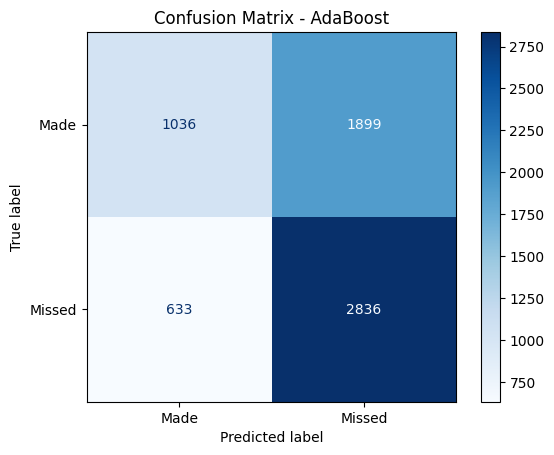

In [11]:
df = loadDF()

features = [
    'SHOT_DIST', 'CLOSE_DEF_DIST', 'SHOT_CLOCK', 'TOUCH_TIME', 'DRIBBLES', 'PTS_TYPE',
    'FINAL_MARGIN', 'SHOT_NUMBER', 'GAME_CLOCK', 'PERIOD', 'LOCATION_NUM', 'W_NUM'
]
X = df[features]
y = df['SHOT_RESULT'].map({'made': 1, 'missed': 0})

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.05)

model = DecisionTreeClassifier(max_depth=3)

ada_model = AdaBoostClassifier(estimator=model, n_estimators=50)
ada_model.fit(X_train, y_train)

y_pred = ada_model.predict(X_test)

print("\nAdaBoost - Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Made", "Missed"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - AdaBoost")
plt.show()

# Faster boosting

In [12]:

estimators = [50, 100, 150, 200, 250]
depths = [1, 3, 5, 7, 9]

for i in range(10):
    best_accuracy = 0
    best_params = None

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.05)

    for estimator in estimators:
        for depth in depths:
            model = xgb.XGBClassifier(n_estimators=estimator, max_depth=depth, learning_rate=0.1)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = (estimator, depth)
        #print(best_params, best_accuracy)

    print(f"Best parameters: {best_params}, Accuracy: {best_accuracy}")

Best parameters: (50, 5), Accuracy: 0.6285134291068083
Best parameters: (50, 9), Accuracy: 0.6239850093691443
Best parameters: (150, 3), Accuracy: 0.6236727045596502
Best parameters: (250, 5), Accuracy: 0.6278888194878202
Best parameters: (250, 3), Accuracy: 0.6188319800124922
Best parameters: (50, 5), Accuracy: 0.6171143035602749
Best parameters: (50, 5), Accuracy: 0.6207058088694566
Best parameters: (100, 3), Accuracy: 0.6089943785134291
Best parameters: (50, 3), Accuracy: 0.622579637726421
Best parameters: (150, 5), Accuracy: 0.6213304184884447



XGBoost - Accuracy: 0.6121174266083698

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.83      0.70      3494
           1       0.63      0.35      0.45      2910

    accuracy                           0.61      6404
   macro avg       0.62      0.59      0.58      6404
weighted avg       0.62      0.61      0.59      6404



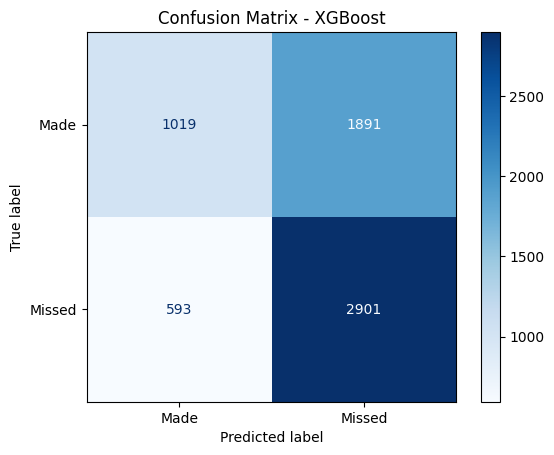

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.05)

model = xgb.XGBClassifier(n_estimators=250, max_depth=3, learning_rate=0.1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\nXGBoost - Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Made", "Missed"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - XGBoost")
plt.show()



Random Forest - Rezultati za različite parametre
Parametri: {'n_estimators': 50, 'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 5}, Točnost: 0.6213
              precision    recall  f1-score   support

           0       0.61      0.84      0.71      3489
           1       0.66      0.35      0.46      2915

    accuracy                           0.62      6404
   macro avg       0.63      0.60      0.58      6404
weighted avg       0.63      0.62      0.60      6404



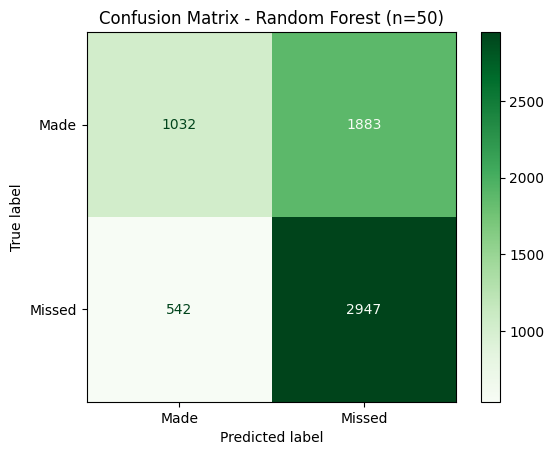

Parametri: {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 2}, Točnost: 0.6274
              precision    recall  f1-score   support

           0       0.61      0.86      0.72      3489
           1       0.68      0.35      0.46      2915

    accuracy                           0.63      6404
   macro avg       0.64      0.60      0.59      6404
weighted avg       0.64      0.63      0.60      6404



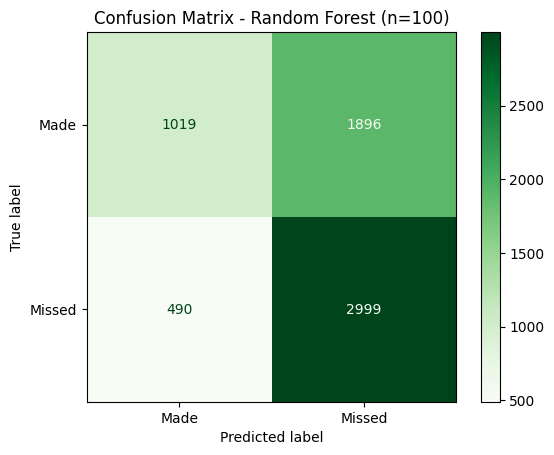

Parametri: {'n_estimators': 200, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1}, Točnost: 0.6271
              precision    recall  f1-score   support

           0       0.61      0.85      0.71      3489
           1       0.67      0.36      0.47      2915

    accuracy                           0.63      6404
   macro avg       0.64      0.61      0.59      6404
weighted avg       0.64      0.63      0.60      6404



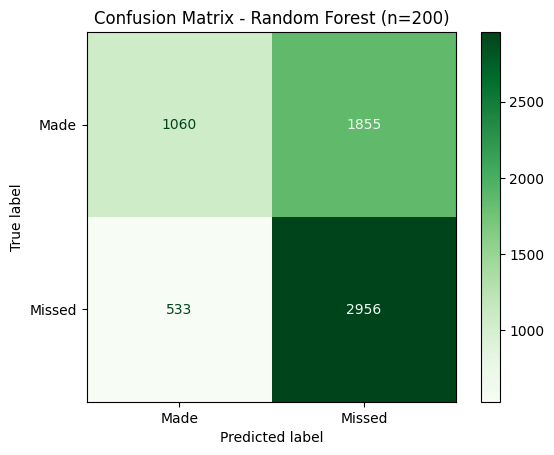

In [14]:
df = loadDF()

encoder = LabelEncoder()
df['CLOSEST_DEFENDER_ENCODED'] = encoder.fit_transform(df['CLOSEST_DEFENDER'])

features = [
    'SHOT_DIST', 'CLOSE_DEF_DIST', 'SHOT_CLOCK', 'TOUCH_TIME', 'DRIBBLES', 'PTS_TYPE',
    'FINAL_MARGIN', 'SHOT_NUMBER', 'GAME_CLOCK', 'PERIOD', 'LOCATION_NUM', 'W_NUM'
]
X = df[features]
y = df['SHOT_RESULT'].map({'made': 1, 'missed': 0})

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.05, random_state=42)

rf_params = [
    {'n_estimators': 50, 'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 5},
    {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 2},
    {'n_estimators': 200, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1},
]

print("\nRandom Forest - Rezultati za različite parametre")
for params in rf_params:
    rf_model = RandomForestClassifier(
        n_estimators=params['n_estimators'],
        max_depth=params['max_depth'],
        min_samples_split=params['min_samples_split'],
        min_samples_leaf=params['min_samples_leaf'],
        random_state=42
    )
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred_rf)
    print(f"Parametri: {params}, Točnost: {acc:.4f}")
    print(classification_report(y_test, y_pred_rf))
    cm = confusion_matrix(y_test, y_pred_rf, labels=[1, 0])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Made", "Missed"])
    disp.plot(cmap="Greens")
    plt.title(f"Confusion Matrix - Random Forest (n={params['n_estimators']})")
    plt.show()